## Importing the required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

## Reading and Extracting data from .csv files

In [3]:
train_tweets = pd.read_csv('train_tweets.csv')
test_tweets = pd.read_csv('test_tweets.csv')

In [4]:
train_tweets = train_tweets[['label','tweet']]
test = test_tweets['tweet']

## Exploratory Data Analysis

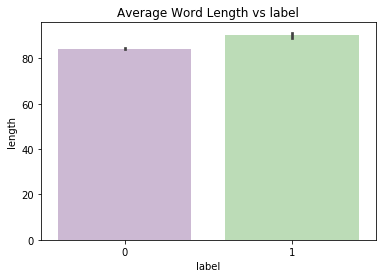

In [5]:
train_tweets['length'] = train_tweets['tweet'].apply(len)
fig1 = sns.barplot('label','length',data = train_tweets,palette='PRGn')
plt.title('Average Word Length vs label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')

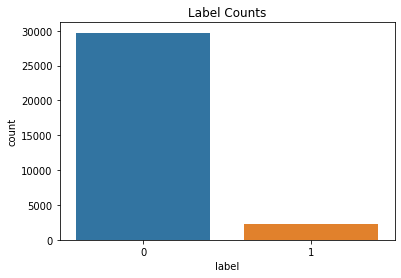

In [6]:
fig2 = sns.countplot(x= 'label',data = train_tweets)
plt.title('Label Counts')
plot = fig2.get_figure()
plot.savefig('Count Plot.png')

## Feature Engineering

In [7]:
def text_processing(tweet):
    
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)

In [ ]:
nltk.download()

In [8]:
train_tweets['tweet_list'] = train_tweets['tweet'].apply(text_processing)
test_tweets['tweet_list'] = test_tweets['tweet'].apply(text_processing)

In [9]:
train_tweets[train_tweets['label']==1].drop('tweet',axis=1).head()

,label,length,tweet_list
13,1,74,"[cnn, call, michigan, middle, school, wall, ch..."
14,1,101,"[comment, australia, opkillingbay, seashepherd..."
17,1,22,"[retweet, agree]"
23,1,47,"[lumpy, say, prove, lumpy]"
34,1,104,"[unbelievable, century, need, something, like,..."


## Model Selection and Machine Learning

In [10]:
X = train_tweets['tweet']
y = train_tweets['label']
test = test_tweets['tweet']

In [11]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)

In [12]:
#Machine Learning Pipeline
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7f91342a3ef0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [13]:
predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))
print ('\n')
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6307
           1       0.19      1.00      0.31        86

    accuracy                           0.94      6393
   macro avg       0.59      0.97      0.64      6393
weighted avg       0.99      0.94      0.96      6393



[[5932  375]
 [   0   86]]
0.9413420929141249
